In [1]:
import nbpresent
nbpresent.__version__

ModuleNotFoundError: No module named 'nbpresent'

In [ ]:
import nbpresent
nbpresent.__version__

In [2]:
import pandas as pd

### Demonstrate deep learning by predicting wine quality
* Wine data
* Keras deep learning tool
* Code and experimental process 

#### Data
Data from UC Irvine Center for Machine Learning. http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [3]:
white_df = pd.read_csv("winequality-white.csv", 
                       sep=';')
red_df = pd.read_csv("winequality-red.csv", 
                       sep=';')

In [4]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Prep
#### Combine to a single dataframe

In [6]:
red_df['is_red'] = 1
white_df['is_red'] = 0
wine_df = red_df.append(white_df, ignore_index=True)

#### Bin quality data:  1=Very Good, 0=Not Very Good

In [9]:
wine_df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
bins = [2, 6, 9]  # 0=3-6, 1=7-9
wine_df['quality_cat'] = pd.cut(wine_df.quality, bins, labels=[0, 1])
wine_df.quality_cat.value_counts()


0    5220
1    1277
Name: quality_cat, dtype: int64

#### Separate data into features and labels

In [11]:
X_df = wine_df.drop(['quality', 'quality_cat'], 1)
y_df = wine_df.quality_cat

In [12]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
is_red                  6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [13]:
y_df.value_counts()

0    5220
1    1277
Name: quality_cat, dtype: int64

#### Split data into train, test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_df.get_values(), y_df.get_values(), test_size = 0.30, random_state=2)

#### Standardize data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Keras:  Deep Learning Tool

* https://keras.io/
* Python open source tool, available as a python package inside Wells Fargo firewall
* Easy interface to build deep learning models
* Sits on top of Theano or Google's Tensorflow open source deep learning engines

Note:  
* This demo including all tools are on my desktop
* For real projects with big data, can use the Advanced Analytics Lab cluster:
  * https://eda.wellsfargo.com/collab/home/EDAAA/SitePages/Home.aspx

### Wine Data:  12 Variables

In [20]:
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
columns = wine_df.drop(['quality', 'quality_cat'], 1).columns
for col in columns:
    print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
is_red


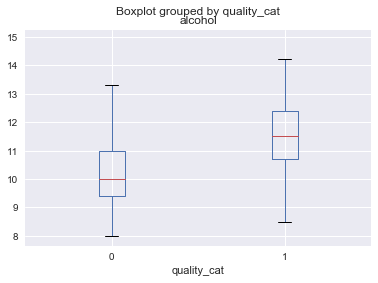

In [22]:
ax = wine_df.boxplot(column='alcohol', by='quality_cat')

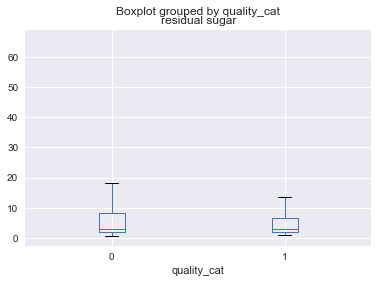

In [23]:
ax = wine_df.boxplot(column='residual sugar', by='quality_cat')

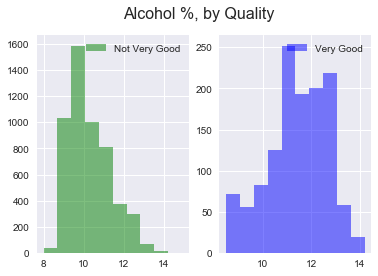

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
 
wine_df[wine_df.quality_cat == 0]['alcohol'].hist(alpha=0.5, label='Not Very Good', color='g', ax=axes[0])
wine_df[wine_df.quality_cat == 1]['alcohol'].hist(alpha=0.5, label='Very Good', color='b', ax=axes[1])

axes[0].legend()
axes[1].legend()

fig.suptitle('Alcohol %, by Quality', fontsize=16)
plt.show()

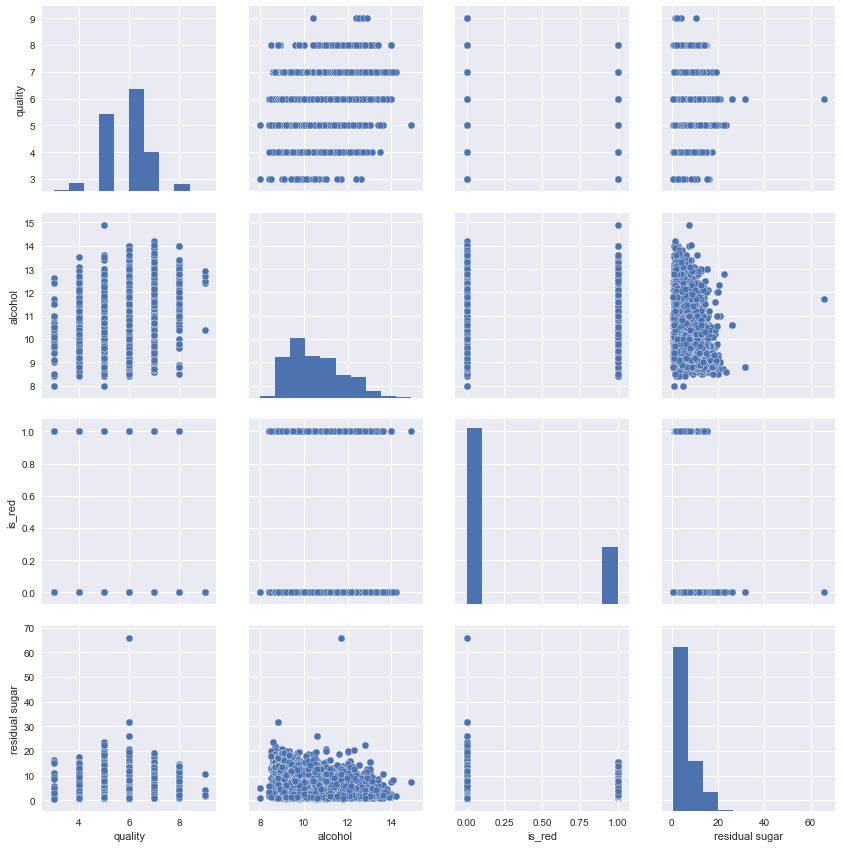

In [25]:
sb.set_context("notebook", font_scale=1)
sb.pairplot(wine_df[['quality', 'alcohol', 'is_red', 'residual sugar']], size=3)

### Build, Train and Test Model

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [51]:
# Build Model
model = Sequential()

# Add the inputs and first hidden layer
model.add(Dense(12, input_dim=12, activation='relu'))

# Add another hidden layer
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

# Predict on Training Data (In Sample)
y_pred_train = model.predict_classes(X_train)

# Predict on Test Data (Out of Sample)
y_pred_test = model.predict_classes(X_test)

Epoch 1/100
4547/4547 [==============================] - 0s - loss: 0.5161 - acc: 0.8065     
Epoch 2/100
4547/4547 [==============================] - 0s - loss: 0.4616 - acc: 0.8065     
Epoch 3/100
4547/4547 [==============================] - 0s - loss: 0.4350 - acc: 0.8065     
Epoch 4/100
4547/4547 [==============================] - 0s - loss: 0.4173 - acc: 0.8067     
Epoch 5/100
4547/4547 [==============================] - 0s - loss: 0.4036 - acc: 0.8080     
Epoch 6/100
4547/4547 [==============================] - 0s - loss: 0.3933 - acc: 0.8139     
Epoch 7/100
4547/4547 [==============================] - 0s - loss: 0.3860 - acc: 0.8219     
Epoch 8/100
4547/4547 [==============================] - 0s - loss: 0.3809 - acc: 0.8289     
Epoch 9/100
4547/4547 [==============================] - 0s - loss: 0.3770 - acc: 0.8296     
Epoch 10/100
4547/4547 [==============================] - 0s - loss: 0.3752 - acc: 0.8326     
Epoch 11/100
4547/4547 [==============================] - 0

### Evaluate on Test (Out-of-Sample) Data

* Accuracy: fraction of correct predictions
* Precision: fraction of wines predicted to be good that actually are good
* Recall:  fraction of good wines predicted to be good

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [25]:
# Add this experiment's metrics to the dataframes
def update_eval_dataframes(y_train, y_pred_train, y_test, y_pred_test, eval_df):
    num_experiment = len(eval_df) + 1

    eval_list = [[accuracy_score(y_train, y_pred_train),
                  accuracy_score(y_test, y_pred_test),
                  num_experiment]]
    eval_df = eval_df.append(pd.DataFrame(eval_list,
                  columns=['Train: In Sample', 'Test: Out of Sample', 'Experiment']), 
                  ignore_index=True)

    return eval_df

In [26]:
def plot_results(eval_df):
    ax = eval_df.plot(kind='line', x='Experiment', y=['Train: In Sample','Test: Out of Sample'], figsize=(8, 3), fontsize=14)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) #set x-axis to integer
    plt.title('Accuracy', fontsize=20)
    plt.xticks(rotation=0)
    plt.show()

In [45]:
# Create the evaluation dataframes; only run before the first experiment
eval_df = pd.DataFrame(columns=['Experiment', 'Train: In Sample', 'Test: Out of Sample'])

In [52]:
# Evaluate Results:  Accuracy = fraction of correct predictions
eval_df = update_eval_dataframes(y_train, y_pred_train, y_test, y_pred_test, eval_df)
eval_df[['Experiment', 'Train: In Sample', 'Test: Out of Sample']].head()

,Experiment,Train: In Sample,Test: Out of Sample
0,1.0,0.822520,0.809744
1,2.0,0.831977,0.822051
2,3.0,0.848472,0.821538


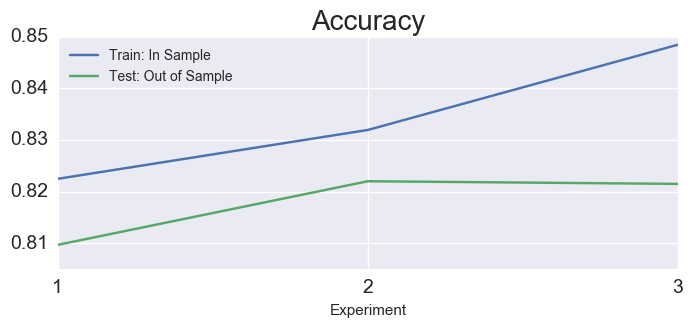

In [53]:
plot_results(eval_df)

In [32]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_test)

array([[1491,   62],
       [ 308,   89]])